# TF-IDF

## Homework #12 by Glaktionova Natalia

IMDB Dataset of 50K Movie Reviews

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings("ignore")

In [13]:
import nltk
from nltk.corpus import stopwords

Считываем и просматриваем данные

In [2]:
df = pd.read_csv('data\IMDB Dataset.zip',compression='zip')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [7]:
df.shape

(50000, 2)

Обработаем данные: очистим от мусора, приведем к нижнему регистру, проведем стемминг

In [8]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [22]:
df['review'] = df['review'].apply(lambda x: ''.join(BeautifulSoup(x).findAll(text=True)))

In [27]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [28]:
df.review = df.review.apply(lambda x: x.lower())

In [29]:
df.review = df.review.apply(lambda x: data_Stemmer(x))

Посмотрим на результат

In [30]:
df.review[0]

"one review mention watch 1 oz episod hooked. right, exact happen me.th first thing struck oz brutal unflinch scene violence, set right word go. trust me, show faint heart timid. show pull punch regard drugs, sex violence. hardcore, classic use word.it call oz nicknam given oswald maximum secur state penitentary. focus main emerald city, experiment section prison cell glass front face inwards, privaci high agenda. em citi home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show dare. forget pretti pictur paint mainstream audiences, forget charm, forget romance...oz mess around. first episod ever saw struck nasti surreal, say readi it, watch more, develop tast oz, got accustom high level graphic violence. violence, injustic (crook guard who'll sold nickel, inmat who'll kill order get away it, well mannered, middl class inmat turn prison bitch due 

**TF-IDF**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm=None)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size = 0.30, random_state = 42)

In [78]:
Xtr_tfidf = tf_vectorizer.fit_transform(X_train)
Xtest_tfidf = tf_vectorizer.transform(X_test)

**Logistic Regression**

In [79]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1)
logit_cv.fit(Xtr_tfidf, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [80]:
print(accuracy_score(logit_cv.predict(Xtr_tfidf), y_train))
print(accuracy_score(logit_cv.predict(Xtest_tfidf), y_test))

print(classification_report(logit_cv.predict(Xtest_tfidf), y_test))

0.9460571428571428
0.8964666666666666
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7234
           1       0.91      0.89      0.90      7766

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [81]:
def plot_confusion(predictions, yval, title):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array, index = [i for i in titles],
                      columns = [i for i in titles])
    plt.figure(figsize = (5,5))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap="YlGnBu", cbar=False)
    plt.title(title);

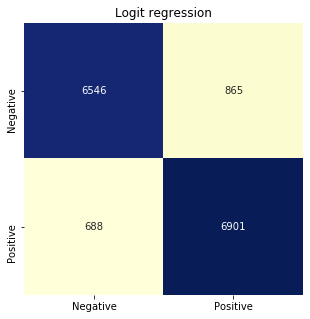

In [82]:
plot_confusion(logit_cv.predict(Xtest_tfidf), y_test, "Logit regression")

Посмотрим на слова с положительной окраской

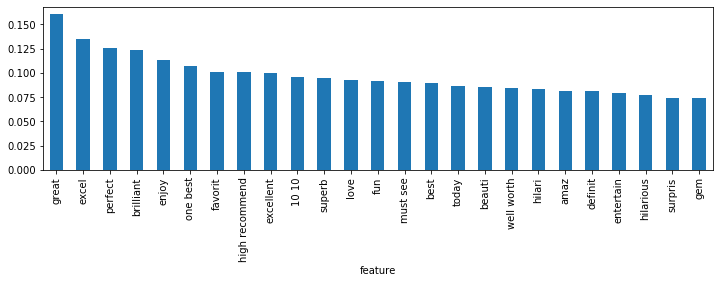

In [83]:
featureImportance = pd.DataFrame({"feature":tf_vectorizer.get_feature_names(), 
                                  "importance": logit_cv.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"][:25].plot('bar', figsize=(12, 3));

Посмотрим на слова с отрицательной окраской

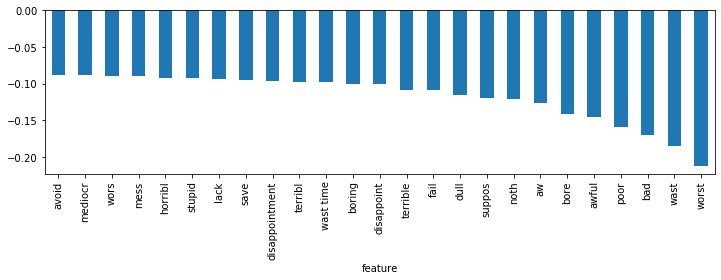

In [84]:
featureImportance["importance"][-25:].plot('bar', figsize=(12, 3));